# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Ryanza Aufa Yansa
- **Email:** mc295d5y0579@student.devacademy.id
- **ID Dicoding:** MC295D5Y0579 / ryanza_aufa_y

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana tren kualitas udara di lokasi Aotizhongxin dan Changping selama periode 2013-2017?
- Pertanyaan 2 : Pada tahun berapakah rata-rata tertinggi nilai PM2.5 terjadi pada kedua lokasi?
- Pertanyaan 3: Seberapa besar pengaruh cuaca terhadap nilai PM2.5?

## Import Semua Packages/Library yang Digunakan
Library yang dibutuhkan akan dipanggil pada bagian ini

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats

## Data Wrangling

### Gathering Data
Pada bagian ini, data yang diperlukan untuk menjawab pertanyaan-pertanyaan dikumpulkan

In [2]:
#Mengambil dan membaca data csv pada direktori
aotizhongxin_df = pd.read_csv("/content/PRSA_Data_Aotizhongxin_20130301-20170228.csv")

#Menampilkan 5 data teratas
aotizhongxin_df.head(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [3]:
#Mengambil dan membaca data csv pada direktori
changping_df = pd.read_csv("/content/PRSA_Data_Changping_20130301-20170228.csv")

#Menampilkan 5 data teratas
changping_df.head(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


In [4]:
#Menampilkan jumlah baris dan kolom pada dataset (baris, kolom)
aotizhongxin_df.shape, changping_df.shape,

#Dataset yang tidak digunakan
#dingling_df.shape, dongsi_df.shape, guanyuan_df.shape, gucheng_df.shape, huairou_df.shape, nongzang_df.shape, shunyi_df.shape, tiantan_df.shape, wanliu_df.shape, wanshouxigong_df.shape

((35064, 18), (35064, 18))

**Insight:**
- Jumlah data pada setiap Aotizhongxin dan Changpin Station adalah (35064, 18) baris dan kolom

### Assessing Data

###**Assessing Dataset Aotizhongxin Station**

In [5]:
#Menampilkan informasi pada dataset
aotizhongxin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [6]:
#Menampilkan missing value
aotizhongxin_isna_value = pd.DataFrame({"Nilai_Isna" : aotizhongxin_df.isna().sum()})
aotizhongxin_isnull_value = pd.DataFrame({"Nilai_Isnull" :aotizhongxin_df.isnull().sum()})
aotizhongxin_isna_value, aotizhongxin_isnull_value

(         Nilai_Isna
 No                0
 year              0
 month             0
 day               0
 hour              0
 PM2.5           925
 PM10            718
 SO2             935
 NO2            1023
 CO             1776
 O3             1719
 TEMP             20
 PRES             20
 DEWP             20
 RAIN             20
 wd               81
 WSPM             14
 station           0,
          Nilai_Isnull
 No                  0
 year                0
 month               0
 day                 0
 hour                0
 PM2.5             925
 PM10              718
 SO2               935
 NO2              1023
 CO               1776
 O3               1719
 TEMP               20
 PRES               20
 DEWP               20
 RAIN               20
 wd                 81
 WSPM               14
 station             0)

In [7]:
#Menampilkan nilai duplikat pada dataset
aotizhongxin_duplicated_val = aotizhongxin_df.duplicated().sum()
print(f"Terdapat {aotizhongxin_duplicated_val} data duplikat pada dataset")

Terdapat 0 data duplikat pada dataset


In [8]:
#Mengecek apakah nilai pada kolom wind direction bersifat unik
print(aotizhongxin_df["wd"].unique())

['NNW' 'N' 'NW' 'NNE' 'ENE' 'E' 'NE' 'W' 'SSW' 'WSW' 'SE' 'WNW' 'SSE'
 'ESE' 'S' 'SW' nan]


In [9]:
#Mengecek apakah value pada tahun, bulan, hari dan jam pada rentang yang seharusnya
print("Unique values in year:", aotizhongxin_df["year"].unique())
print("Unique values in month:", aotizhongxin_df["month"].unique())
print("Unique values in day:", aotizhongxin_df["day"].unique())
print("Unique values in hour:", aotizhongxin_df["hour"].unique())

Unique values in year: [2013 2014 2015 2016 2017]
Unique values in month: [ 3  4  5  6  7  8  9 10 11 12  1  2]
Unique values in day: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
Unique values in hour: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [10]:
#Menambahkan kolom datetime
aotizhongxin_df["datetime"] = pd.to_datetime(aotizhongxin_df[["year", "month", "day", "hour"]])
aotizhongxin_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01 00:00:00
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01 01:00:00
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01 02:00:00
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01 03:00:00
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01 04:00:00


**Insight: Aothizhongxin station**
- Terdapat missing_value pada dataset pada kolom PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd dan WSPM
- Tidak terdapat data duplikat pada dataset
- Terdapat nama kolom yang sulit dibaca
- Value pada kolom year, month, day dan hour berada pada rentang yang seharusnya
- Value pada month dapat dikonversi agar memudahkan untuk analisis

###**Assessing Dataset Changping Station**

In [11]:
#Menampilkan informasi pada dataset
changping_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [12]:
#Menampilkan missing value
changping_isna_value = pd.DataFrame({"Nilai_Isna" : changping_df.isna().sum()})
changping_isnull_value = pd.DataFrame({"Nilai_Isnull" :changping_df.isnull().sum()})
changping_isna_value, changping_isnull_value

(         Nilai_Isna
 No                0
 year              0
 month             0
 day               0
 hour              0
 PM2.5           774
 PM10            582
 SO2             628
 NO2             667
 CO             1521
 O3              604
 TEMP             53
 PRES             50
 DEWP             53
 RAIN             51
 wd              140
 WSPM             43
 station           0,
          Nilai_Isnull
 No                  0
 year                0
 month               0
 day                 0
 hour                0
 PM2.5             774
 PM10              582
 SO2               628
 NO2               667
 CO               1521
 O3                604
 TEMP               53
 PRES               50
 DEWP               53
 RAIN               51
 wd                140
 WSPM               43
 station             0)

In [13]:
#Menampilkan nilai duplikat pada dataset
changping_duplicated_value = changping_df.duplicated().sum()
print(f"Terdapat {changping_duplicated_value} data duplikat pada dataset")

Terdapat 0 data duplikat pada dataset


In [14]:
#Mengecek apakah nilai pada kolom wind direction bersifat unik
print(changping_df["wd"].unique())

['E' 'ENE' 'NNE' 'N' 'NNW' 'NW' 'NE' 'SW' 'SSW' 'WSW' 'ESE' 'SE' 'S' 'WNW'
 'SSE' 'W' nan]


In [15]:
#Mengecek apakah value pada tahun, bulan, hari dan jam pada rentang yang seharusnya
print("Unique values in year:", changping_df["year"].unique())
print("Unique values in month:", changping_df["month"].unique())
print("Unique values in day:", changping_df["day"].unique())
print("Unique values in hour:", changping_df["hour"].unique())

Unique values in year: [2013 2014 2015 2016 2017]
Unique values in month: [ 3  4  5  6  7  8  9 10 11 12  1  2]
Unique values in day: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
Unique values in hour: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [16]:
#Menambahkan kolom datetime
changping_df["datetime"] = pd.to_datetime(changping_df[["year", "month", "day", "hour"]])
changping_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping,2013-03-01 00:00:00
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping,2013-03-01 01:00:00
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping,2013-03-01 02:00:00
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping,2013-03-01 03:00:00
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping,2013-03-01 04:00:00


**Insight: Changping station**
- Terdapat missing_value pada dataset pada kolom PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd dan WSPM
- Tidak terdapat data duplikat pada dataset
- Terdapat nama kolom yang sulit dibaca
- Value pada kolom year, month, day dan hour berada pada rentang yang seharusnya
- Value pada month dapat dikonversi agar memudahkan untuk analisis

### Cleaning Data

##**Cleaning Dataset Aotizhingxin Station**

In [17]:
#Menyalin dataset dari dataset yang asli untuk menjaga orisinalitas data
data_aotizhongxin = aotizhongxin_df.copy()
data_aotizhongxin.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01 00:00:00
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01 01:00:00
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01 02:00:00
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01 03:00:00
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01 04:00:00


In [18]:
#Menampilkan informasi dari dataset
data_aotizhongxin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   No        35064 non-null  int64         
 1   year      35064 non-null  int64         
 2   month     35064 non-null  int64         
 3   day       35064 non-null  int64         
 4   hour      35064 non-null  int64         
 5   PM2.5     34139 non-null  float64       
 6   PM10      34346 non-null  float64       
 7   SO2       34129 non-null  float64       
 8   NO2       34041 non-null  float64       
 9   CO        33288 non-null  float64       
 10  O3        33345 non-null  float64       
 11  TEMP      35044 non-null  float64       
 12  PRES      35044 non-null  float64       
 13  DEWP      35044 non-null  float64       
 14  RAIN      35044 non-null  float64       
 15  wd        34983 non-null  object        
 16  WSPM      35050 non-null  float64       
 17  station   35

In [19]:
#Mengganti nama kolom pada dataset
data_aotizhongxin.rename(columns={
    "TEMP": "Temperature",
    "PRES": "Pressure",
    "DEWP": "Dew_Point",
    "RAIN": "Rain",
    "wd": "Wind_Direction",
    "WSPM": "Wind_Speed"
}, inplace=True)

#Mengkonversi Value pada kolom month
data_aotizhongxin.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

#Menampilkan 5 data teratas
data_aotizhongxin.head()

<ipython-input-19-5a44977ac5ed>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_aotizhongxin.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,Temperature,Pressure,Dew_Point,Rain,Wind_Direction,Wind_Speed,station,datetime
0,1,2013,Mar,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01 00:00:00
1,2,2013,Mar,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01 01:00:00
2,3,2013,Mar,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01 02:00:00
3,4,2013,Mar,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01 03:00:00
4,5,2013,Mar,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01 04:00:00


In [20]:
#Mendapatkan median dari PM2.5, PM10, SO2, NO2, CO, O3, Temperature, Pressure, Dew_Point, Rain, dan Wind_Speed, lalu memasukkanya pada missing value
#Fungsi untuk mengganti missing value dengan median
def median_imputation(data, column):
    median = data[column].median()
    data[column].fillna(median, inplace=True)

#Kolom yang memiliki missing value (selain Wind_Direction)
columns_to_filled = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "Temperature", "Pressure", "Dew_Point", "Rain", "Wind_Speed"]

#Mengganti missing value dengan nilai median setiap kolom
for col in columns_to_filled:
    median_imputation(data_aotizhongxin, col)

<ipython-input-20-6145453ec24a>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(median, inplace=True)


In [21]:
#Mengganti nilai missing value pada Wind_Direction dengan nilai mode
data_aotizhongxin["Wind_Direction"].fillna(data_aotizhongxin["Wind_Direction"].mode()[0], inplace=True)

<ipython-input-21-084181cc4c36>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_aotizhongxin["Wind_Direction"].fillna(data_aotizhongxin["Wind_Direction"].mode()[0], inplace=True)


In [22]:
# Fungsi klasifikasi cuaca yang diperbaiki
def classify_weather(row):
    if row["Rain"] > 5 and row["Wind_Speed"] > 20:
        return "Badai"
    elif row["Rain"] > 5:
        return "Hujan Lebat"
    elif row["Rain"] > 0:
        return "Hujan Ringan"
    elif row["Dew_Point"] > 20 and abs(row["Temperature"] - row["Dew_Point"]) < 2:
        return "Berkabut"
    elif row["Wind_Speed"] > 20:
        return "Berangin"
    elif row["PM2.5"] < 50 and row["PM10"] < 50 and row["Rain"] == 0 and row["Temperature"] > 15:
        return "Cerah"
    elif 50 <= row["PM2.5"] < 100 or 50 <= row["PM10"] < 150:
        return "Mendung"
    elif row["Dew_Point"] < 0 and row["Temperature"] < 5:
        return "Udara Dingin & Kering"
    elif row["Dew_Point"] > 20 and row["Temperature"] > 25:
        return "Udara Panas & Lembap"
    else:
        return "Normal"

# Terapkan ke dataset
data_aotizhongxin["Weather_Condition"] = data_aotizhongxin.apply(classify_weather, axis=1)

# Cek hasil klasifikasi
data_aotizhongxin["Weather_Condition"].value_counts()

,count
Weather_Condition,
Mendung,15331
Normal,6594
Udara Dingin & Kering,6038
Cerah,4364
Hujan Ringan,1281
Berkabut,890
Udara Panas & Lembap,467
Hujan Lebat,99


In [23]:
# Fungsi untuk mengklasifikasikan kualitas udara berdasarkan PM2.5
def classify_air_quality(pm25):
    if pm25 <= 50:
        return "Baik"
    elif pm25 <= 100:
        return "Sedang"
    elif pm25 <= 150:
        return "Tidak Sehat untuk Kelompok Sensitif"
    elif pm25 <= 200:
        return "Tidak Sehat"
    elif pm25 <= 300:
        return "Sangat Tidak Sehat"
    else:
        return "Berbahaya"

# Terapkan fungsi ke dataset

data_aotizhongxin["Air_Quality"] = data_aotizhongxin["PM2.5"].apply(classify_air_quality)

# Cek hasil klasifikasi
print(data_aotizhongxin["Air_Quality"].value_counts())

Air_Quality
Baik                                   15546
Sedang                                  9401
Tidak Sehat untuk Kelompok Sensitif     4591
Tidak Sehat                             2522
Sangat Tidak Sehat                      2113
Berbahaya                                891
Name: count, dtype: int64


**Insight: Aotizhongxin Station**
- Mengubah value dari kolom month agar mudah untuk dibaca
- Mengubah nama dari beberapa kolom
- Mengganti missing value dengan median dari masing-masing kolom (kecuali Wind Direction) agar tidak terlalu mempengaruhi distribusi data
- Mengganti missing value pada kolom Wind Direction dengan mode karena merupakan data dengan tipe kategori
- Menambahkan kolom kondisi cuaca (Weather_Condition)
- Menambahkan kolom kualitas udara berdasarkan PM2.5 dengan standar AQI (https://aqicn.org/scale/id/)

##**Cleaning Dataset Changping Station**

In [24]:
#Menyalin dataset dari dataset yang asli untuk menjaga orisinalitas data
data_changping = changping_df.copy()
data_changping.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping,2013-03-01 00:00:00
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping,2013-03-01 01:00:00
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping,2013-03-01 02:00:00
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping,2013-03-01 03:00:00
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping,2013-03-01 04:00:00


In [25]:
#Menampilkan informasi dari dataset
data_changping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   No        35064 non-null  int64         
 1   year      35064 non-null  int64         
 2   month     35064 non-null  int64         
 3   day       35064 non-null  int64         
 4   hour      35064 non-null  int64         
 5   PM2.5     34290 non-null  float64       
 6   PM10      34482 non-null  float64       
 7   SO2       34436 non-null  float64       
 8   NO2       34397 non-null  float64       
 9   CO        33543 non-null  float64       
 10  O3        34460 non-null  float64       
 11  TEMP      35011 non-null  float64       
 12  PRES      35014 non-null  float64       
 13  DEWP      35011 non-null  float64       
 14  RAIN      35013 non-null  float64       
 15  wd        34924 non-null  object        
 16  WSPM      35021 non-null  float64       
 17  station   35

In [26]:
#Mengganti nama kolom pada dataset
data_changping.rename(columns={
    "TEMP": "Temperature",
    "PRES": "Pressure",
    "DEWP": "Dew_Point",
    "RAIN": "Rain",
    "wd": "Wind_Direction",
    "WSPM": "Wind_Speed"
}, inplace=True)

#Mengkonversi Value pada kolom month
data_changping.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

#Menampilkan 5 data teratas
data_changping.head()

<ipython-input-26-9f8153736449>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_changping.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,Temperature,Pressure,Dew_Point,Rain,Wind_Direction,Wind_Speed,station,datetime
0,1,2013,Mar,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping,2013-03-01 00:00:00
1,2,2013,Mar,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping,2013-03-01 01:00:00
2,3,2013,Mar,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping,2013-03-01 02:00:00
3,4,2013,Mar,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping,2013-03-01 03:00:00
4,5,2013,Mar,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping,2013-03-01 04:00:00


In [27]:
#Mendapatkan median dari PM2.5, PM10, SO2, NO2, CO, O3, Temperature, Pressure, Dew_Point, Rain, dan Wind_Speed, lalu memasukkanya pada missing value
#Fungsi untuk mengganti missing value dengan median
def median_imputation(data, column):
    median = data[column].median()
    data[column].fillna(median, inplace=True)

#Kolom yang memiliki missing value (selain Wind_Direction)
columns_to_filled = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "Temperature", "Pressure", "Dew_Point", "Rain", "Wind_Speed"]

#Mengganti missing value dengan nilai median setiap kolom
for col in columns_to_filled:
    median_imputation(data_changping, col)

<ipython-input-27-eb2b301db48c>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(median, inplace=True)


In [28]:
#Mengganti nilai missing value pada Wind_Direction dengan nilai mode
data_changping["Wind_Direction"].fillna(data_changping["Wind_Direction"].mode()[0], inplace=True)

<ipython-input-28-9d53836f8f34>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_changping["Wind_Direction"].fillna(data_changping["Wind_Direction"].mode()[0], inplace=True)


In [29]:
# Fungsi klasifikasi cuaca yang diperbaiki
def classify_weather(row):
    if row["Rain"] > 5 and row["Wind_Speed"] > 20:
        return "Badai"
    elif row["Rain"] > 5:
        return "Hujan Lebat"
    elif row["Rain"] > 0:
        return "Hujan Ringan"
    elif row["Dew_Point"] > 20 and abs(row["Temperature"] - row["Dew_Point"]) < 2:
        return "Berkabut"
    elif row["Wind_Speed"] > 20:
        return "Berangin"
    elif row["PM2.5"] < 50 and row["PM10"] < 50 and row["Rain"] == 0 and row["Temperature"] > 15:
        return "Cerah"
    elif 50 <= row["PM2.5"] < 100 or 50 <= row["PM10"] < 150:
        return "Mendung"
    elif row["Dew_Point"] < 0 and row["Temperature"] < 5:
        return "Udara Dingin & Kering"
    elif row["Dew_Point"] > 20 and row["Temperature"] > 25:
        return "Udara Panas & Lembap"
    else:
        return "Normal"

# Terapkan ke dataset
data_changping["Weather_Condition"] = data_changping.apply(classify_weather, axis=1)

# Cek hasil klasifikasi
data_changping["Weather_Condition"].value_counts()

,count
Weather_Condition,
Mendung,15696
Normal,5986
Udara Dingin & Kering,5954
Cerah,5478
Hujan Ringan,1263
Udara Panas & Lembap,371
Berkabut,229
Hujan Lebat,87


In [30]:
# Fungsi untuk mengklasifikasikan kualitas udara berdasarkan PM2.5
def classify_air_quality(pm25):
    if pm25 <= 50:
        return "Baik"
    elif pm25 <= 100:
        return "Sedang"
    elif pm25 <= 150:
        return "Tidak Sehat untuk Kelompok Sensitif"
    elif pm25 <= 200:
        return "Tidak Sehat"
    elif pm25 <= 300:
        return "Sangat Tidak Sehat"
    else:
        return "Berbahaya"

# Terapkan fungsi ke dataset

data_changping["Air_Quality"] = data_changping["PM2.5"].apply(classify_air_quality)

# Cek hasil klasifikasi
print(data_changping["Air_Quality"].value_counts())

Air_Quality
Baik                                   18800
Sedang                                  7749
Tidak Sehat untuk Kelompok Sensitif     4141
Tidak Sehat                             2062
Sangat Tidak Sehat                      1843
Berbahaya                                469
Name: count, dtype: int64


**Insight: Changping Station**
- Mengubah value dari kolom month agar mudah untuk dibaca
- Mengubah nama dari beberapa kolom
- Mengganti missing value dengan median dari masing-masing kolom (kecuali Wind Direction) agar tidak terlalu mempengaruhi distribusi data
- Mengganti missing value pada kolom Wind Direction dengan mode karena merupakan data dengan tipe kategori
- Menambahkan kolom kondisi cuaca (Weather_Condition)
- Menambahkan kolom kualitas udara berdasarkan PM2.5 dengan standar AQI (https://aqicn.org/scale/id/)

## Exploratory Data Analysis (EDA)

### Explore Dataset Aotizhongxin Station

In [31]:
#Menampilkan ringkasan statistik
aotizhongxin_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,datetime
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496,2015-03-01 11:30:00
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000,2013-03-01 00:00:00
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000,2014-03-01 05:45:00
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000,2015-03-01 11:30:00
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000,2016-02-29 17:15:00
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000,2017-02-28 23:00:00
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,1.204071,NaN


**Insight: Aotizhongxin Station**
- Rentang tanggal pada dataset dari 01/Maret/2013/00:00 sampai dengan 23/Februari/2017/23:00
- Rata-rata nilai PM2.5 sebesar 82.77 dengan standar deviasi 82.13
- Rata-rata nilai PM10 sebesar 110.06 dengan standar deviasi 95.22
- Temperature memiliki rentang dari -16.8 derajat celsius sampai dengan 40.5 derajat celsius
- Titik embun memiliki rata-rata sebesar 3.13 dengan nilai tertinggi sebesar 28.5 dan terendah sebesar -35.3
- Pengukuran dilakukan setiap 1 jam

In [32]:
#Nilai rata-rata PM2.5 berdasarkan tahun
pm25_aotizhongxin = data_aotizhongxin.groupby("year").agg({
    "PM2.5": "mean"
    })
pm25_aotizhongxin

,PM2.5
year,
2013,82.355937
2014,88.905422
2015,81.523721
2016,73.779827
2017,94.346751


In [33]:
#Nilai rata-rata PM2.5 berdasarkan kondisi cuaca
data_aotizhongxin.groupby("Weather_Condition").agg({
    "PM2.5": "mean"
    })

,PM2.5
Weather_Condition,
Berkabut,96.485393
Cerah,20.515536
Hujan Lebat,63.777778
Hujan Ringan,63.322639
Mendung,68.302792
Normal,128.210373
Udara Dingin & Kering,106.573799
Udara Panas & Lembap,172.514561


**Insight: Aotizhongxin Station**
- Rata-rata tingkat PM2.5 tertinggi terjadi pada tahun 2017, sedangkan yang terendah terjadi pada tahun 2016
- Rata-rata tingkat PM2.5 tertinggi terjadi pada kondisi cuaca mengalami udara panas dan lembab, sedangkan terendah pada kondisi cuaca cerah

### Explore Dataset Changping Station

In [34]:
#Menampilkan ringkasan statistik
changping_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,datetime
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34290.000000,34482.000000,34436.000000,34397.000000,33543.000000,34460.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,1.853836,2015-03-01 11:30:00
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000,2013-03-01 00:00:00
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,15.636600,3.400000,999.300000,-10.200000,0.000000,1.000000,2014-03-01 05:45:00
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.700000,1007.400000,1.800000,0.000000,1.500000,2015-03-01 11:30:00
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,131.000000,18.000000,60.358200,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,2.300000,2016-02-29 17:15:00
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,882.000000,999.000000,310.000000,226.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000,10.000000,2017-02-28 23:00:00
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.326926,83.441738,20.975331,29.519796,1103.056282,54.316674,11.365313,10.225664,13.822099,0.752899,1.309808,NaN


**Insight: Changping Station**
- Rentang tanggal pada dataset dari 01/Maret/2013/00:00 sampai dengan 23/Februari/2017/23:00
- Rata-rata nilai PM2.5 sebesar 71.09 dengan standar deviasi 72.32
- Rata-rata nilai PM10 sebesar 94.6 dengan standar deviasi 83.44
- Temperature memiliki rentang dari -16.6 derajat celsius sampai dengan 41.4 derajat celsius
- Titik embun memiliki rata-rata sebesar 1.5 dengan nilai tertinggi sebesar 27.2 dan terendah sebesar -35.1
- Pengukuran dilakukan setiap 1 jam

In [35]:
#Nilai rata-rata PM2.5 berdasarkan tahun
pm25_changping = data_changping.groupby("year").agg({
    "PM2.5": "mean"
    })
pm25_changping

,PM2.5
year,
2013,72.524782
2014,78.339075
2015,68.720879
2016,61.452755
2017,79.764124


In [36]:
#Nilai rata-rata PM2.5 berdasarkan kondisi cuaca
data_changping.groupby("Weather_Condition").agg({
    "PM2.5": "mean"
    })

,PM2.5
Weather_Condition,
Berkabut,74.340611
Cerah,17.976177
Hujan Lebat,68.793103
Hujan Ringan,58.361837
Mendung,66.632550
Normal,106.458269
Udara Dingin & Kering,88.955828
Udara Panas & Lembap,176.964960


**Insight: Changping Station**
- Rata-rata tingkat PM2.5 tertinggi terjadi pada tahun 2017, sedangkan yang terendah terjadi pada tahun 2016
- Rata-rata tingkat PM2.5 tertinggi terjadi pada kondisi cuaca mengalami udara panas dan lembab, sedangkan terendah pada kondisi cuaca cerah

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren kualitas udara di lokasi Aotizhongxin dan Changping selama periode 2013-2017?

In [37]:
#Menampilkan tren kualitas udara di Aotizhongxin dan Changping selama periode 2013-2017

# Ambil hanya tahun dan bulan
data_aotizhongxin["year_month"] = data_aotizhongxin["datetime"].dt.to_period("M")
data_changping["year_month"] = data_changping["datetime"].dt.to_period("M")

# Hitung jumlah data untuk setiap kategori kualitas udara per bulan
trend_aotizhongxin = data_aotizhongxin.groupby(["year_month", "Air_Quality"]).size().unstack().fillna(0)
trend_changping = data_changping.groupby(["year_month", "Air_Quality"]).size().unstack().fillna(0)

# Ubah index period menjadi datetime agar bisa diproses oleh matplotlib
trend_aotizhongxin.index = trend_aotizhongxin.index.to_timestamp()
trend_changping.index = trend_changping.index.to_timestamp()

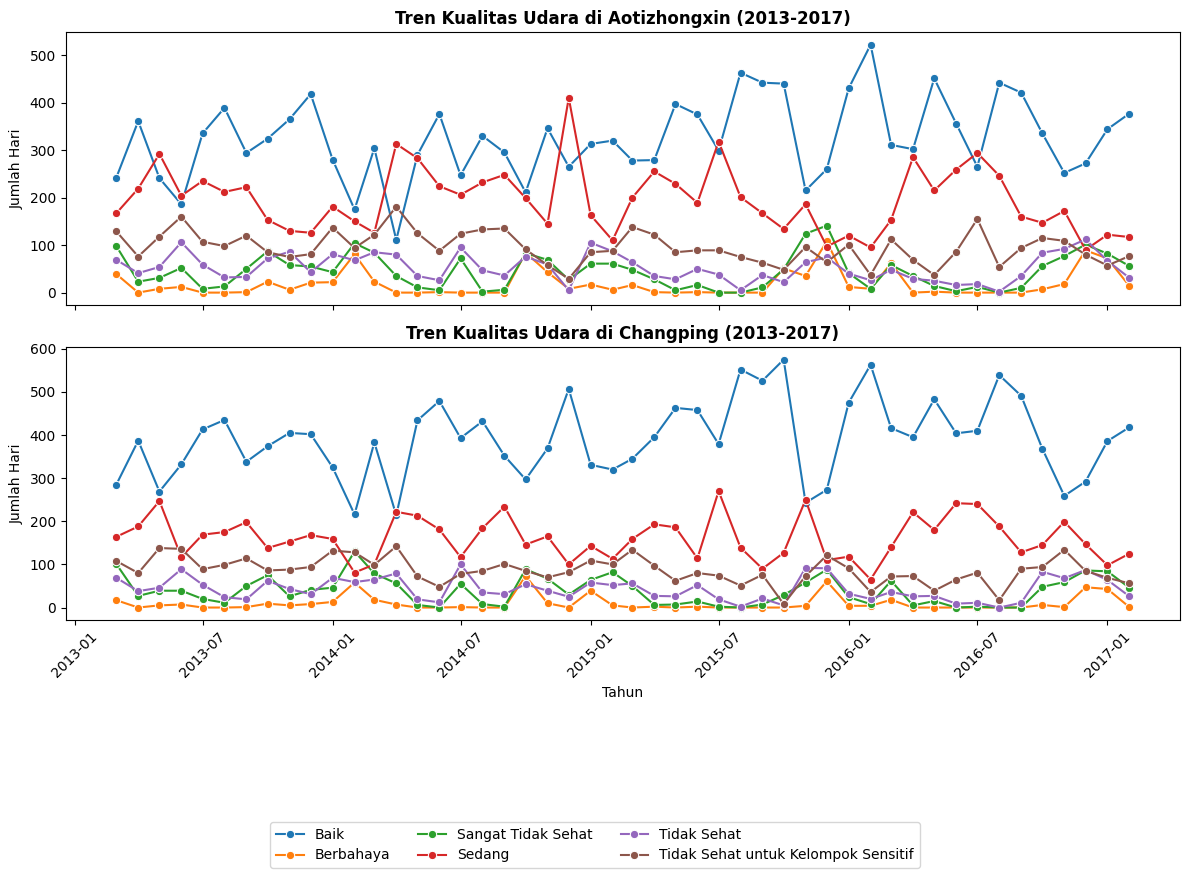

In [38]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Line Chart untuk Aotizhongxin
for category in trend_aotizhongxin.columns:
    sns.lineplot(x=trend_aotizhongxin.index, y=trend_aotizhongxin[category], marker="o", label=category, ax=ax[0])

ax[0].set_title("Tren Kualitas Udara di Aotizhongxin (2013-2017)", fontsize=12, fontweight="bold")
ax[0].set_ylabel("Jumlah Hari")

# Line Chart untuk Changping
for category in trend_changping.columns:
    sns.lineplot(x=trend_changping.index, y=trend_changping[category], marker="o", label=category, ax=ax[1])

ax[1].set_title("Tren Kualitas Udara di Changping (2013-2017)", fontsize=12, fontweight="bold")
ax[1].set_ylabel("Jumlah Hari")
ax[1].set_xlabel("Tahun")

# Hapus legend dari subplot agar tidak menutupi grafik
ax[0].get_legend().remove()
ax[1].get_legend().remove()

# Ambil legend dari salah satu subplot untuk ditampilkan di luar
handles, labels = ax[1].get_legend_handles_labels()

# Tampilkan legend di luar area plot
fig.legend(handles, labels, loc="lower center", ncol=3, bbox_to_anchor=(0.5, -0.1), prop={'size':10})

# Atur tampilan agar tidak terpotong
plt.xticks(rotation=45)
plt.tight_layout(rect=[0, 0.1, 1, 1])  # Beri lebih banyak ruang di bawah untuk legend
plt.show()


**Insight**
- Kualitas udara "Baik" terlihat paling sering terjadi dibandingkan yang lainnya pada kedua lokasi. Namun, terdapat **fluktuasi** signifikan yang menunjukan bahwa ada periode tertentu yang dimana kualitas udara yang lebih buruk. Kualitas udara "Baik" paling sering terjadi pada periode 2016 awal.
-

### Pertanyaan 2: Pada tahun berapakah rata-rata tertinggi nilai PM2.5 terjadi pada kedua lokasi?

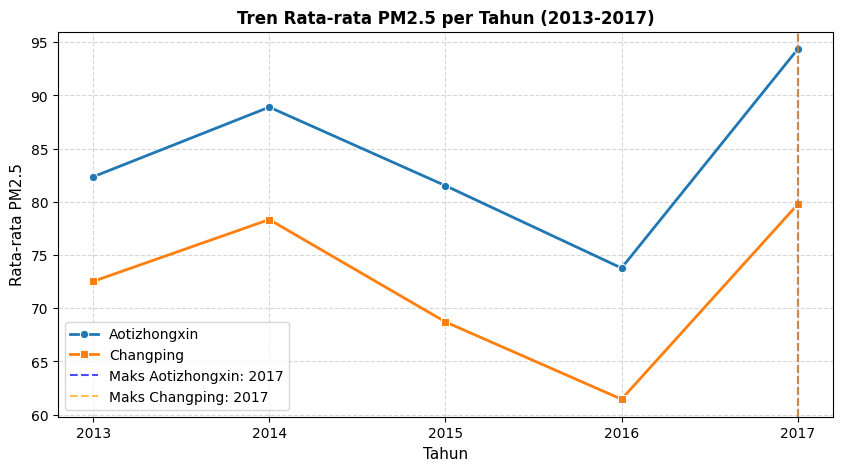

In [39]:
#Menunjukkan nilai rata-rata tertinggi untuk PM2.5 tiap tahun
# Hitung rata-rata PM2.5 per tahun untuk kedua lokasi
pm25_aotizhongxin = data_aotizhongxin.groupby("year")["PM2.5"].mean()
pm25_changping = data_changping.groupby("year")["PM2.5"].mean()

# Membuat figure dan axis
plt.figure(figsize=(10, 5))

# Plot data
sns.lineplot(x=pm25_aotizhongxin.index, y=pm25_aotizhongxin.values, marker="o", label="Aotizhongxin", linewidth=2)
sns.lineplot(x=pm25_changping.index, y=pm25_changping.values, marker="s", label="Changping", linewidth=2)

# Menandai tahun dengan PM2.5 tertinggi
max_aotizhongxin = pm25_aotizhongxin.idxmax()
max_changping = pm25_changping.idxmax()
plt.axvline(max_aotizhongxin, color="blue", linestyle="--", alpha=0.7, label=f"Maks Aotizhongxin: {max_aotizhongxin}")
plt.axvline(max_changping, color="orange", linestyle="--", alpha=0.7, label=f"Maks Changping: {max_changping}")

# Atur tampilan
plt.title("Tren Rata-rata PM2.5 per Tahun (2013-2017)", fontsize=12, fontweight="bold")
plt.xlabel("Tahun", fontsize=11)
plt.ylabel("Rata-rata PM2.5", fontsize=11)
plt.xticks(pm25_aotizhongxin.index)  # Pastikan sumbu X hanya menampilkan tahun
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

# Tampilkan plot
plt.show()

**Insight:**
- Berdasarkan grafik, terlihat kedua lokasi memiliki tren kenaikan nilai PM2.5 selama periode 2013-2014 dan mengalami penurunan yang signifikan pada tahun 2016. Tetapi pada tahun 2017 nilai PM2.5 mengalami kenaikan yang sangat signifikan hingga menyentuh nilai tertinggi untuk kedua lokasi tersebut
- Di Aotizhongxin nilai rata-rata PM2.5 selalu lebih tinggi untuk setiap tahun dibanding Changping, tetapi mereka memiliki pola yang hampir mirip di setiap tahunnya

### Pertanyaan 3: Seberapa besar pengaruh cuaca terhadap nilai PM2.5?

<ipython-input-40-4eed13599312>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pm25_weather_aotizhongxin.index, y=pm25_weather_aotizhongxin.values, palette=colors_aotizhongxin, ax=ax[0])
<ipython-input-40-4eed13599312>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pm25_weather_changping.index, y=pm25_weather_changping.values, palette=colors_changping, ax=ax[1])


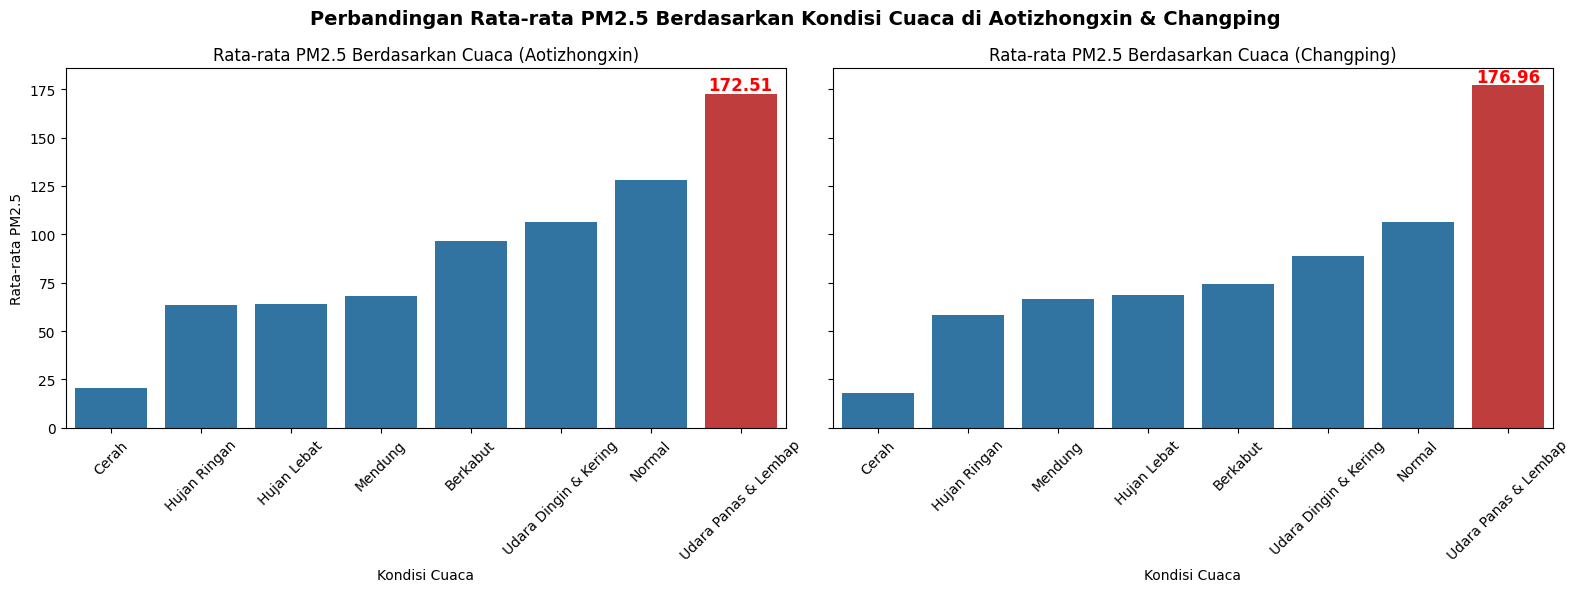

In [40]:
#Menampilkan seberapa besar pengaruh cuaca terhadap nilai PM2.5
# Hitung rata-rata PM2.5 berdasarkan kondisi cuaca di kedua lokasi
pm25_weather_aotizhongxin = data_aotizhongxin.groupby("Weather_Condition")["PM2.5"].mean().sort_values()
pm25_weather_changping = data_changping.groupby("Weather_Condition")["PM2.5"].mean().sort_values()

# Buat warna default biru, dan merah untuk nilai tertinggi
colors_aotizhongxin = ["#1f77b4"] * len(pm25_weather_aotizhongxin)
colors_changping = ["#1f77b4"] * len(pm25_weather_changping)

# Ubah warna nilai tertinggi menjadi merah
colors_aotizhongxin[-1] = "#d62728"
colors_changping[-1] = "#d62728"

# Buat figure dan axis untuk dua lokasi
fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Barplot untuk Aotizhongxin
sns.barplot(x=pm25_weather_aotizhongxin.index, y=pm25_weather_aotizhongxin.values, palette=colors_aotizhongxin, ax=ax[0])
ax[0].set_title("Rata-rata PM2.5 Berdasarkan Cuaca (Aotizhongxin)")
ax[0].set_xlabel("Kondisi Cuaca")
ax[0].set_ylabel("Rata-rata PM2.5")
ax[0].tick_params(axis='x', rotation=45)

# Tambahkan teks nilai tertinggi
max_value_aotizhongxin = pm25_weather_aotizhongxin.max()
max_index_aotizhongxin = pm25_weather_aotizhongxin.idxmax()
ax[0].text(x=pm25_weather_aotizhongxin.index.get_loc(max_index_aotizhongxin), y=max_value_aotizhongxin + 2,
           s=f"{max_value_aotizhongxin:.2f}", ha="center", fontsize=12, fontweight="bold", color="red")

# Barplot untuk Changping
sns.barplot(x=pm25_weather_changping.index, y=pm25_weather_changping.values, palette=colors_changping, ax=ax[1])
ax[1].set_title("Rata-rata PM2.5 Berdasarkan Cuaca (Changping)")
ax[1].set_xlabel("Kondisi Cuaca")
ax[1].tick_params(axis='x', rotation=45)

# Tambahkan teks nilai tertinggi
max_value_changping = pm25_weather_changping.max()
max_index_changping = pm25_weather_changping.idxmax()
ax[1].text(x=pm25_weather_changping.index.get_loc(max_index_changping), y=max_value_changping + 2,
           s=f"{max_value_changping:.2f}", ha="center", fontsize=12, fontweight="bold", color="red")

# Atur tampilan
plt.suptitle("Perbandingan Rata-rata PM2.5 Berdasarkan Kondisi Cuaca di Aotizhongxin & Changping", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

**Insight:**
- Pada Aotizhongxin dan Changping, cuaca panas & lembap merupakan kondisi paling berpolusi jika mengacu pada nilai rata-rata PM2.5 dan cuaca cerah memiliki udara paling bersih diantara kondisi yg lain jika mengacu pada nilai rata-rata PM2.5

## Analisis Lanjutan (Opsional)

## Analisis Korelasi

In [41]:
# Hitung korelasi Pearson
corr_aotizhongxin = data_aotizhongxin[['PM2.5', 'Wind_Speed']].corr(method='pearson')
corr_changping = data_changping[['PM2.5', 'Wind_Speed']].corr(method='pearson')

print("Korelasi di Aotizhongxin:")
print(corr_aotizhongxin)

print("\nKorelasi di Changping:")
print(corr_changping)

Korelasi di Aotizhongxin:
               PM2.5  Wind_Speed
PM2.5       1.000000   -0.275157
Wind_Speed -0.275157    1.000000

Korelasi di Changping:
               PM2.5  Wind_Speed
PM2.5       1.000000   -0.270304
Wind_Speed -0.270304    1.000000


**Insight:**
- Nilai korelasi berada di rentang -0.3 hingga 0, yang menunjukkan korelasi negatif lemah antara PM2.5 dan kecepatan angin. Nilai PM2.5 cenderung menurun saat kecepatan angin meningkat, tetapi hubungan ini tidak terlalu kuat.

## Conclusion

- Conclution pertanyaan 1: Tahun 2017 adalah tahun dengan rata-rata tertinggi PM2.5 di Aotizhongxin dan Changping.
- Conclution pertanyaan 2: Tren PM2.5 meningkat signifikan pada 2017 setelah mengalami penurunan pada tahun sebelumnya.
- Conclusion pertanyaan 3: Kondisi cuaca mempengaruhi PM2.5 secara signifikan. Cuaca panas & lembap memiliki rata-rata PM2.5 tertinggi, sedangkan cuaca cerah memiliki PM2.5 terendah. Cuaca berembun, normal, dan dingin-kering juga memiliki PM2.5 cukup tinggi.
- Conclusion analisis lanjutan: Korelasi antara PM2.5 dan Wind Speed di Aotizhongxin (-0.275) dan Changping (-0.270) menunjukkan hubungan negatif lemah Artinya, saat kecepatan angin meningkat, PM2.5 cenderung menurun, tetapi efeknya tidak terlalu kuat.

In [42]:
!pip install pipreqs
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
!pipreqs "/content/drive/MyDrive/Colab Notebooks/ryanza_analisis_data_python" --scan-notebooks

Traceback (most recent call last):
  File "/usr/local/bin/pipreqs", line 8, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pipreqs/pipreqs.py", line 609, in main
    init(args)
  File "/usr/local/lib/python3.11/dist-packages/pipreqs/pipreqs.py", line 599, in init
    generate_requirements_file(path, imports, symbol)
  File "/usr/local/lib/python3.11/dist-packages/pipreqs/pipreqs.py", line 209, in generate_requirements_file
    with _open(path, "w") as out_file:
  File "/usr/lib/python3.11/contextlib.py", line 137, in __enter__
    return next(self.gen)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pipreqs/pipreqs.py", line 91, in _open
    file = open(filename, mode)
           ^^^^^^^^^^^^^^^^^^^^
FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/ryanza_analisis_data_python/requirements.txt'


In [44]:
#Menyimpan data yang siap untuk dianalisis
data_aotizhongxin.to_csv('aotizhongxin.csv', index=False)
data_changping.to_csv('changping.csv', index = False)